# Copy items-Copy1.csv file into pandas dataframe and 
# replace all fields that are empty with NaN

In [89]:
import pandas as pd
import numpy as np

df_items = pd.read_csv('items-Copy1.csv') # read dataset into pandas dataframe

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

documents = list(df_items['description']) # get only description column and create documents list for this
    
#print(documents)

In [2]:
from measures import Measures # utilized to encapsulate measures from each case
json_output = {} # will be used later to save dictionaries of measures to json files
json_output['cases'] = []

In [3]:
np.random.seed(500)

# Go through all rows in dataframe and check for if
1. anger is in tags
2. anger is not in tags

## This is a binary classification task

In [4]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either anger or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'anger' in row['tag']:
        labels_list_word.append('anger') # anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # not anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_anger = pd.DataFrame() # create empty dataframe
df_anger['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_anger['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_anger['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_anger.loc[df_anger['label word'] == 'anger']

,label word,label numerical,description
1,anger,1,The best costume for Halloween worth posting. ...
2,anger,1,"Keep on whining and crying for your president,..."
3,anger,1,"End the whining and crying, end the riots with..."
7,anger,1,Art imitates life art. This photo is great.
8,anger,1,"In America, racial oppression and racism were ..."
...,...,...,...
2964,anger,1,Officials of the Highlands High School are inv...
2976,anger,1,"Protect the 2nd. Without it, you won't have an..."
2989,anger,1,"Protect the 2nd. Without it, you won't have an..."
2995,anger,1,"Remember folks, dance and music is a large par..."


# Go through all rows in dataframe and check for if
1. fear is in tags
2. fear is not in tags

In [5]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either fear or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'fear' in row['tag']:
        labels_list_word.append('fear') # fear
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # not anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_fear = pd.DataFrame() # create empty dataframe
df_fear['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_fear['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_fear['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_fear.loc[df_fear['label word'] == 'fear']

,label word,label numerical,description
0,fear,1,Black American racial experience is real. We s...
11,fear,1,Watch this heart-piercing story about a racial...
15,fear,1,People are genuinely scared for their futures!...
23,fear,1,"For years, white supremacists in the Dothan, A..."
25,fear,1,The cop beat this man like he was a runaway sl...
...,...,...,...
2973,fear,1,Give your online shopping a fresh start with t...
2976,fear,1,"Protect the 2nd. Without it, you won't have an..."
2987,fear,1,People really need to understand
2989,fear,1,"Protect the 2nd. Without it, you won't have an..."


# Go through all rows in dataframe and check for if
1. anger and fear are both in tags
2. neither are in the tags

In [6]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either fear or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'fear' in row['tag'] and 'anger' in row['tag']:
        labels_list_word.append('both') # both
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # neither
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_both = pd.DataFrame() # create empty dataframe
df_both['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_both['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_both['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_both.loc[df_both['label word'] == 'both']

,label word,label numerical,description
15,both,1,People are genuinely scared for their futures!...
23,both,1,"For years, white supremacists in the Dothan, A..."
25,both,1,The cop beat this man like he was a runaway sl...
40,both,1,There is a disgusting video Circulating on the...
41,both,1,Black American racial experience is real. We s...
...,...,...,...
2930,both,1,Black Matters. Black community.
2954,both,1,Fast-growing black community. Latest news and ...
2964,both,1,Officials of the Highlands High School are inv...
2976,both,1,"Protect the 2nd. Without it, you won't have an..."


# Data pre-processing

In [7]:
'''from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

# Step - a : Remove blank rows if any.
df_anger['description'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_anger['description'] = [entry.lower() for entry in df_anger['description']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df_anger['description']= [word_tokenize(entry) for entry in df_anger['description']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_anger['description']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df_anger.loc[index,'description'] = str(Final_words)'''

"from nltk.tokenize import word_tokenize\nfrom collections import defaultdict\nfrom nltk.corpus import wordnet as wn\nfrom nltk.stem import WordNetLemmatizer\nfrom nltk import pos_tag\nfrom nltk.corpus import stopwords\n\n# Step - a : Remove blank rows if any.\ndf_anger['description'].dropna(inplace=True)\n# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently\ndf_anger['description'] = [entry.lower() for entry in df_anger['description']]\n# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words\ndf_anger['description']= [word_tokenize(entry) for entry in df_anger['description']]\n# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.\n# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun\ntag_map = defaultdict(lambda : wn.NOUN)\ntag_map['J'] = wn.ADJ\ntag_map['V'] = wn.VERB\ntag_map['R'] = wn.

In [8]:
# df_anger['description']

# Create train test split for classification for anger or not anger

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train_anger, X_test_anger, Y_train_anger, Y_test_anger = train_test_split(df_anger['description'], 
                                                                                            df_anger['label numerical'],
                                                                                            test_size=0.3)

print('Number of rows in the total set for anger: {}'.format(df_anger.shape[0]))
print('Number of rows in the training set for anger: {}'.format(X_train_anger.shape[0]))
print('Number of rows in the test set for anger: {}'.format(X_test_anger.shape[0]))

Number of rows in the total set for anger: 3012
Number of rows in the training set for anger: 2108
Number of rows in the test set for anger: 904


# Ensure that labels are numerical values that the model can understand

In [10]:
'''from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Y_train_anger = Encoder.fit_transform(Y_train_anger)
Y_test_anger = Encoder.fit_transform(Y_test_anger)'''

'from sklearn.preprocessing import LabelEncoder\n\nEncoder = LabelEncoder()\nY_train_anger = Encoder.fit_transform(Y_train_anger)\nY_test_anger = Encoder.fit_transform(Y_test_anger)'

# Utilize Term frequency - Inverse Document
2. Term Frequency - Summarizes how often a given word appears within a document
1. Inverse Document Frequency - Down scales words that appear a lot accross documents

### * Essentially highlights words that are more interesting, e.g. frequent in document but not accross all documents

In [11]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect_anger = TfidfVectorizer(max_features=5000)
Tfidf_vect_anger.fit(df_anger['description'])
X_train_Tfidf_anger = Tfidf_vect_anger.transform(X_train_anger)
X_test_Tfidf_anger = Tfidf_vect_anger.transform(X_test_anger)'''

"from sklearn.feature_extraction.text import TfidfVectorizer\n\nTfidf_vect_anger = TfidfVectorizer(max_features=5000)\nTfidf_vect_anger.fit(df_anger['description'])\nX_train_Tfidf_anger = Tfidf_vect_anger.transform(X_train_anger)\nX_test_Tfidf_anger = Tfidf_vect_anger.transform(X_test_anger)"

In [12]:
#print(Tfidf_vect_anger.vocabulary_)

In [13]:
#print(X_train_Tfidf_anger)

In [14]:
!pip3 install matplotlib==3.1.0 # use this version of matplotlib as other version causes problems with seaborn

  Using cached https://files.pythonhosted.org/packages/ea/de/8c82ad7acc647357bc76d6a90385cba7df8e57d99e25ca38e5e12178682f/matplotlib-3.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 71kB 1.3MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 15.2MB 671kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/c5/9831f281c6fb57945e83fdf39ff036cacfdc84aa1988bb3150b330533050/kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Library/Python/3.7'
Consider us

# Create an instance of CountVectorizer
# Fit training data and return matrix
# transform testing data and return matrix

In [15]:

from sklearn.feature_extraction.text import CountVectorizer

# instantiate Countvectorizer method
count_vector_anger = CountVectorizer()

# fit training data and return matrix
training_data_anger = count_vector_anger.fit_transform(X_train_anger)

# transform testing data and return matrix
testing_data_anger = count_vector_anger.transform(X_test_anger)

# Utilize svm from sklearn to create a support vector machine classifier and form predictions

In [16]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_anger = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_anger.fit(training_data_anger,Y_train_anger)

# predict the labels on validation dataset
predictions_SVM_anger = SVM_anger.predict(testing_data_anger)

# Print out classification report for anger vs not anger

Classification report for SVM anger classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

       anger       0.81      0.85      0.83       667
        none       0.51      0.45      0.48       237

    accuracy                           0.74       904
   macro avg       0.66      0.65      0.65       904
weighted avg       0.73      0.74      0.74       904

---------------------------------------------------------- 
Accuracy score:  0.7433628318584071
Precision score:  0.45147679324894513
Recall score:  0.5119617224880383
F1 score:  0.4798206278026906
---------------------------------------------------------- 
Confusion matrix SVM anger: 

[[565 102]
 [130 107]]


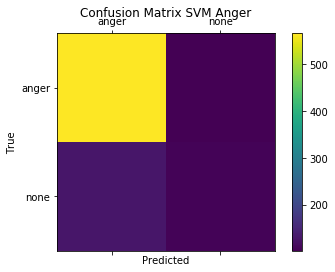

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

print('Classification report for SVM anger classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_anger, predictions_SVM_anger, target_names = ['anger', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_anger, Y_test_anger)))
print('Precision score: ', format(precision_score(predictions_SVM_anger, Y_test_anger)))
print('Recall score: ', format(recall_score(predictions_SVM_anger, Y_test_anger)))
print('F1 score: ', format(f1_score(predictions_SVM_anger, Y_test_anger)))
print('---------------------------------------------------------- ')

labels = ['anger', 'none']
cm = confusion_matrix(list(Y_test_anger), predictions_SVM_anger)
print("Confusion matrix SVM anger: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Anger')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_anger.png')
plt.show()

# Create train test split for classification for fear or not fear

In [18]:
from sklearn.model_selection import train_test_split

X_train_fear, X_test_fear, Y_train_fear, Y_test_fear = train_test_split(df_fear['description'], 
                                                                            df_fear['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for fear: {}'.format(df_fear.shape[0]))
print('Number of rows in the training set for fear: {}'.format(X_train_fear.shape[0]))
print('Number of rows in the test set for fear: {}'.format(X_test_fear.shape[0]))

Number of rows in the total set for fear: 3012
Number of rows in the training set for fear: 2259
Number of rows in the test set for fear: 753


# Create an instance of CountVectorizer
# Fit training data and return matrix
# transform testing data and return matrix

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate Countvectorizer method
count_vector_fear = CountVectorizer()

# fit training data and return matrix
training_data_fear = count_vector_fear.fit_transform(X_train_fear)

# transform testing data and return matrix
testing_data_fear = count_vector_fear.transform(X_test_fear)

# Utilize svm from sklearn to create a support vector machine classifier and form predictions

In [20]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_fear = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_fear.fit(training_data_fear,Y_train_fear)

# predict the labels on validation dataset
predictions_SVM_fear = SVM_fear.predict(testing_data_fear)

# Print out classification report for fear vs not fear

Classification report for SVM fear classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        fear       0.92      0.94      0.93       675
        none       0.38      0.32      0.35        78

    accuracy                           0.88       753
   macro avg       0.65      0.63      0.64       753
weighted avg       0.87      0.88      0.87       753

---------------------------------------------------------- 
Accuracy score:  0.8751660026560425
Precision score:  0.32051282051282054
Recall score:  0.3787878787878788
F1 score:  0.3472222222222222
---------------------------------------------------------- 
Confusion matrix SVM fear: 

[[634  41]
 [ 53  25]]


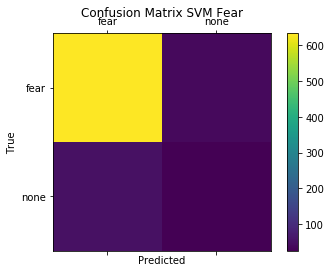

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

print('Classification report for SVM fear classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_fear, predictions_SVM_fear, target_names = ['fear', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_fear, Y_test_fear)))
print('Precision score: ', format(precision_score(predictions_SVM_fear, Y_test_fear)))
print('Recall score: ', format(recall_score(predictions_SVM_fear, Y_test_fear)))
print('F1 score: ', format(f1_score(predictions_SVM_fear, Y_test_fear)))
print('---------------------------------------------------------- ')

labels = ['fear', 'none']
cm = confusion_matrix(list(Y_test_fear), predictions_SVM_fear)
print("Confusion matrix SVM fear: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Fear')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_fear.png')
plt.show()

# Create train test split for classification for both or not both

In [22]:
X_train_both, X_test_both, Y_train_both, Y_test_both = train_test_split(df_both['description'], 
                                                                        df_both['label numerical'], 
                                                                        random_state=1)

print('Number of rows in the total set for both: {}'.format(df_both.shape[0]))
print('Number of rows in the training set for both: {}'.format(X_train_both.shape[0]))
print('Number of rows in the test set for both: {}'.format(X_test_both.shape[0]))

Number of rows in the total set for both: 3012
Number of rows in the training set for both: 2259
Number of rows in the test set for both: 753


# Create an instance of CountVectorizer
# Fit training data and return matrix
# transform testing data and return matrix

In [23]:
# instantiate Countvectorizer method
count_vector_both = CountVectorizer()

# fit training data and return matrix
training_data_both = count_vector_both.fit_transform(X_train_both)

# transform testing data and return matrix
testing_data_both = count_vector_both.transform(X_test_both)

# Utilize svm from sklearn to create a support vector machine classifier and form predictions

In [24]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_both = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_both.fit(training_data_both,Y_train_both)

# predict the labels on validation dataset
predictions_SVM_both = SVM_both.predict(testing_data_both)

# Print out classification report for both vs not both

Classification report for SVM both classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        both       0.94      0.96      0.95       707
        none       0.14      0.09      0.11        46

    accuracy                           0.91       753
   macro avg       0.54      0.53      0.53       753
weighted avg       0.89      0.91      0.90       753

---------------------------------------------------------- 
Accuracy score:  0.9110225763612217
Precision score:  0.08695652173913043
Recall score:  0.13793103448275862
F1 score:  0.10666666666666666
---------------------------------------------------------- 
Confusion matrix SVM both: 

[[682  25]
 [ 42   4]]


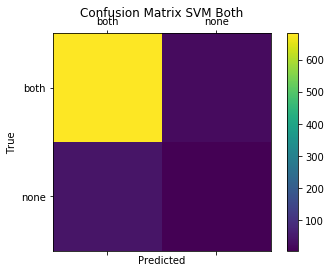

In [25]:
print('Classification report for SVM both classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_both, predictions_SVM_both, target_names = ['both', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_both, Y_test_both)))
print('Precision score: ', format(precision_score(predictions_SVM_both, Y_test_both)))
print('Recall score: ', format(recall_score(predictions_SVM_both, Y_test_both)))
print('F1 score: ', format(f1_score(predictions_SVM_both, Y_test_both)))
print('---------------------------------------------------------- ')

labels = ['both', 'none']
cm = confusion_matrix(list(Y_test_both), predictions_SVM_both)
print("Confusion matrix SVM both: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Both')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_both.png')
plt.show()

# Specificity measures the proportion of actual negatives that are correctly identified as such. In probability notation: P(T-|D-) = TN / (TN + FP).

In [26]:
def perf_measure(y_actual, y_hat):
    '''
    Description:
        Takes in ground truth and predicted values and through a series
        of comparisons determines the number of True Positives (TP), False
        Positives (FP), True Negatives (TN), False Negatives (FN) and 
        returns these values in a tuple.
    Input:
        y_actual: Actual values of y set
        y_hat: Predicted values of y set
    Output:
        (TP, FP, TN, FN): Tuple of performance measures
    '''
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Go through all values
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1: # True Positive
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]: # False Positive
           FP += 1
        if y_actual[i]==y_hat[i]==0: # True Negative
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]: # False Negative
           FN += 1

    return(TP, FP, TN, FN)

# Sensitivity and Specificity measures for anger, fear and both classifications before any adjustments for imbalance

In [27]:
TP_anger, FP_anger, TN_anger, FN_anger = perf_measure(list(Y_test_anger), list(predictions_SVM_anger))
sensitivity_anger = TP_anger / (TP_anger+FN_anger)
specificity_anger = TN_anger / (TN_anger + FP_anger)
print("Sensitivity Measure for Anger Classification: {sensitivity_anger}".format(sensitivity_anger=str(sensitivity_anger)))
print("Specificity Measure for Anger Classification: {specificity_anger}".format(specificity_anger=str(specificity_anger)))

Sensitivity Measure for Anger Classification: 0.45147679324894513
Specificity Measure for Anger Classification: 0.8470764617691154


In [28]:
TP_fear, FP_fear, TN_fear, FN_fear = perf_measure(list(Y_test_fear), list(predictions_SVM_fear))
sensitivity_fear = TP_fear / (TP_fear+FN_fear)
specificity_fear = TN_fear / (TN_fear + FP_fear)
print("Sensitivity Measure for Fear Classification: {sensitivity_fear}".format(sensitivity_fear=str(sensitivity_fear)))
print("Specificity Measure for Fear Classification: {specificity_fear}".format(specificity_fear=str(specificity_fear)))

Sensitivity Measure for Fear Classification: 0.32051282051282054
Specificity Measure for Fear Classification: 0.9392592592592592


In [29]:
TP_both, FP_both, TN_both, FN_both = perf_measure(list(Y_test_both), list(predictions_SVM_both))
sensitivity_both = TP_both / (TP_both+FN_both)
specificity_both = TN_both / (TN_both + FP_both)
print("Sensitivity Measure for Both Classification: {sensitivity_both}".format(sensitivity_both=str(sensitivity_both)))
print("Specificity Measure for Both Classification: {specificity_both}".format(specificity_both=str(specificity_both)))

Sensitivity Measure for Both Classification: 0.08695652173913043
Specificity Measure for Both Classification: 0.9646393210749646


# Let's try under-sampling for anger classification

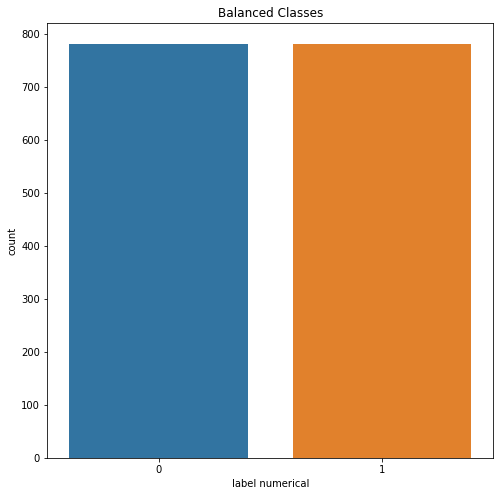

In [30]:
import seaborn as sns

# remove (2231 - 781) = 1450 negative samples from overall set for anger 
# this will ensure that the number of positive and negative samples are equal
pos_anger_df = df_anger.loc[df_anger['label numerical'] == 1]

neg_anger_df = df_anger.loc[df_anger['label numerical'] == 0].sample(n=781, random_state=42)

normalized_anger_df = pd.concat([pos_anger_df, neg_anger_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('label numerical', data=normalized_anger_df)
plt.title('Balanced Classes')
plt.show()

# Repeat steps from above for anger classification again after undersamplilng

Number of rows in the total set for anger: 1562
Number of rows in the training set for anger: 1171
Number of rows in the test set for anger: 391
Classification report for SVM undersampled anger classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

       anger       0.67      0.74      0.70       192
        none       0.72      0.64      0.68       199

    accuracy                           0.69       391
   macro avg       0.69      0.69      0.69       391
weighted avg       0.69      0.69      0.69       391

---------------------------------------------------------- 
Accuracy score:  0.690537084398977
Precision score:  0.6381909547738693
Recall score:  0.7215909090909091
F1 score:  0.6773333333333333
---------------------------------------------------------- 
Confusion matrix SVM undersampled anger: 

[[143  49]
 [ 72 127]]


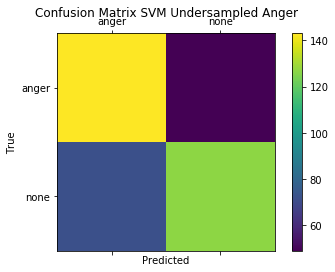

Sensitivity Measure for Anger SVM Classification after undersampling: 0.6381909547738693
Specificity Measure for Anger SVM Classification after undersampling: 0.7447916666666666


In [31]:
X_train_anger, X_test_anger, Y_train_anger, Y_test_anger = train_test_split(normalized_anger_df['description'], 
                                                                            normalized_anger_df['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for anger: {}'.format(normalized_anger_df.shape[0]))
print('Number of rows in the training set for anger: {}'.format(X_train_anger.shape[0]))
print('Number of rows in the test set for anger: {}'.format(X_test_anger.shape[0]))

###################################################################################

# instantiate Countvectorizer method
count_vector_anger = CountVectorizer()

# fit training data and return matrix
training_data_anger = count_vector_anger.fit_transform(X_train_anger)

# transform testing data and return matrix
testing_data_anger = count_vector_anger.transform(X_test_anger)

###################################################################################

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_anger = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_anger.fit(training_data_anger,Y_train_anger)

# predict the labels on validation dataset
predictions_SVM_anger = SVM_anger.predict(testing_data_anger)

###################################################################################

print('Classification report for SVM undersampled anger classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_anger, predictions_SVM_anger, target_names = ['anger', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_anger, Y_test_anger)))
print('Precision score: ', format(precision_score(predictions_SVM_anger, Y_test_anger)))
print('Recall score: ', format(recall_score(predictions_SVM_anger, Y_test_anger)))
print('F1 score: ', format(f1_score(predictions_SVM_anger, Y_test_anger)))
print('---------------------------------------------------------- ')

labels = ['anger', 'none']
cm = confusion_matrix(list(Y_test_anger), predictions_SVM_anger)
print("Confusion matrix SVM undersampled anger: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Undersampled Anger')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_undersampled_anger.png')
plt.show()

TP_anger, FP_anger, TN_anger, FN_anger = perf_measure(list(Y_test_anger), list(predictions_SVM_anger))
sensitivity_anger = TP_anger / (TP_anger+FN_anger)
specificity_anger = TN_anger / (TN_anger + FP_anger)
print("Sensitivity Measure for Anger SVM Classification after undersampling: {sensitivity_anger}".format(sensitivity_anger=str(sensitivity_anger)))
print("Specificity Measure for Anger SVM Classification after undersampling: {specificity_anger}".format(specificity_anger=str(specificity_anger)))

# List of contractions to expand most of the contracted forms to their original forms such as "don't" to "do not"

In [32]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

# Function utilized to clean up text in description field utilizing spacy and regex

In [33]:
import codecs
import unidecode
import re
import spacy
nlp = spacy.load('en')

def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

# Create new column for df_anger called clean_text that contains each description cleaned up

In [34]:
df_anger['clean_text'] = [spacy_cleaner(t) for t in df_anger['description']]

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\ï'
  if __name__ == '__main__':
/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\h'
  if __name__ == '__main__':


# Utilize RandomOverSampler in order to oversample the dataset and utilize NB again to compare metrics after oversampling
- RandomOverSampler repeats some entries of the minority class to balance the data

Using TensorFlow backend.


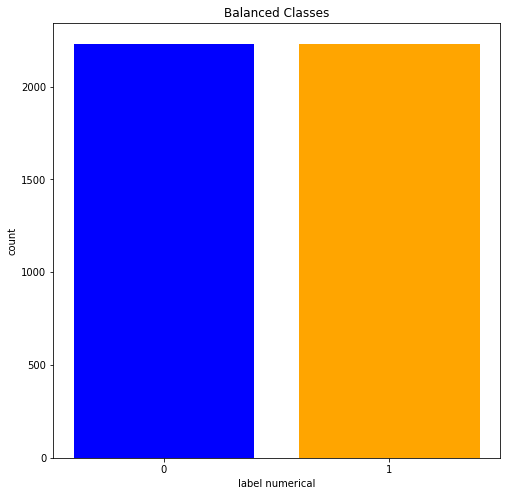

Number of rows in the training set for anger: 3346
Number of rows in the test set for anger: 1116
Classification report for SVM oversampled anger classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

       anger       0.83      0.76      0.79       542
        none       0.79      0.85      0.82       574

    accuracy                           0.80      1116
   macro avg       0.81      0.80      0.80      1116
weighted avg       0.81      0.80      0.80      1116

---------------------------------------------------------- 
Accuracy score:  0.8046594982078853
Precision score:  0.8501742160278746
Recall score:  0.7870967741935484
F1 score:  0.8174204355108877
---------------------------------------------------------- 
Confusion matrix SVM oversampled anger: 

[[410 132]
 [ 86 488]]


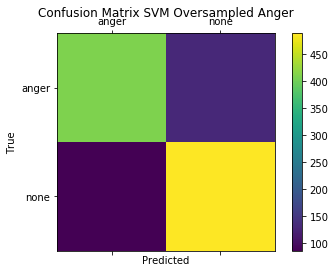

Sensitivity Measure for SVM Anger Classification after oversampling: 0.8501742160278746
Specificity Measure for SVM Anger Classification after oversampling: 0.7564575645756457


In [35]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
# lr = LogisticRegression()

# ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777),lr)
# SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777), lr)

# Fit TfidfVectorizer and use Tfidf representation of texts to oversample
tv = TfidfVectorizer(stop_words=None, max_features=100000)
testing_tfidf = tv.fit_transform(df_anger['clean_text'])
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(testing_tfidf, df_anger['label numerical'])

# df_labelnumerical_temp = df_anger['label numerical']

'''smt = SMOTE(random_state=777)#, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, df_anger['label numerical'])
pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())'''

###################################################################################
'''
loop through all elements of labels and count all positive and negative instances
in order to compare if their counts are balanced
'''
pos_count = 0
neg_count = 0
for y in list(y_ROS):
    if y == 1:
        pos_count += 1
    else:
        neg_count += 1

#plot the dataset after the oversampling
plt.figure(figsize=(8, 8))
y_pos = np.arange(1)
plt.bar(['0', '1'], [neg_count, pos_count], color=('blue', 'orange'))
plt.ylabel('count')
plt.xlabel('label numerical')
plt.title('Balanced Classes')
plt.show()

###################################################################################

X_train_anger, X_test_anger, Y_train_anger, Y_test_anger = train_test_split(X_ROS, 
                                                                            y_ROS, 
                                                                            random_state=1)

#print('Number of rows in the total set for anger: {}'.format(normalized_anger_df.shape[0]))
print('Number of rows in the training set for anger: {}'.format(X_train_anger.shape[0]))
print('Number of rows in the test set for anger: {}'.format(X_test_anger.shape[0]))

###################################################################################

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_anger = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_anger.fit(X_train_anger,Y_train_anger)

# predict the labels on validation dataset
predictions_SVM_anger = SVM_anger.predict(X_test_anger)

###################################################################################

print('Classification report for SVM oversampled anger classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_anger, predictions_SVM_anger, target_names = ['anger', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_anger, Y_test_anger)))
print('Precision score: ', format(precision_score(predictions_SVM_anger, Y_test_anger)))
print('Recall score: ', format(recall_score(predictions_SVM_anger, Y_test_anger)))
print('F1 score: ', format(f1_score(predictions_SVM_anger, Y_test_anger)))
print('---------------------------------------------------------- ')

labels = ['anger', 'none']
cm = confusion_matrix(list(Y_test_anger), predictions_SVM_anger)
print("Confusion matrix SVM oversampled anger: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Oversampled Anger')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_oversampled_anger.png')
plt.show()

TP_anger, FP_anger, TN_anger, FN_anger = perf_measure(list(Y_test_anger), list(predictions_SVM_anger))
sensitivity_anger = TP_anger / (TP_anger+FN_anger)
specificity_anger = TN_anger / (TN_anger + FP_anger)
print("Sensitivity Measure for SVM Anger Classification after oversampling: {sensitivity_anger}".format(sensitivity_anger=str(sensitivity_anger)))
print("Specificity Measure for SVM Anger Classification after oversampling: {specificity_anger}".format(specificity_anger=str(specificity_anger)))

measures_dict_angry = {'accuracy': accuracy_score(predictions_SVM_anger, Y_test_anger),
                'precision': precision_score(predictions_SVM_anger, Y_test_anger),
                'recall': recall_score(predictions_SVM_anger, Y_test_anger),
                'f1': f1_score(predictions_SVM_anger, Y_test_anger),
                'sensitivity': sensitivity_anger,
                'specificity': specificity_anger,
                'name': 'Anger SVM Oversampled'}
anger_oversampled_SVM_measures = Measures('anger_oversampled_SVM_measures', **measures_dict_angry)
anger_oversampled_SVM_measures.write_to_file()
json_output['cases'].append(measures_dict_angry)

# Let's try under-sampling for fear classification

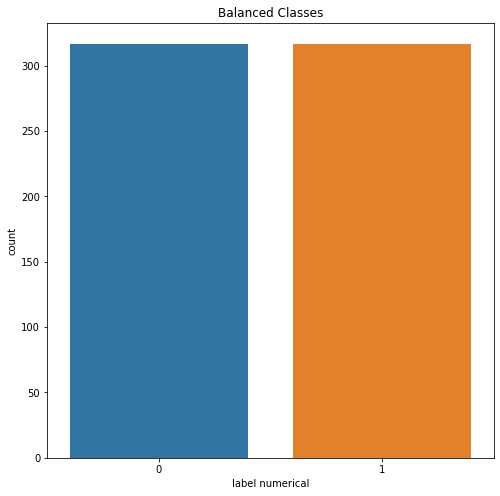

In [36]:
# remove negative samples from overall set for fear 
# this will ensure that the number of positive and negative samples are equal
pos_fear_df = df_fear.loc[df_fear['label numerical'] == 1]

neg_fear_df = df_fear.loc[df_fear['label numerical'] == 0].sample(n=317, random_state=42)

normalized_fear_df = pd.concat([pos_fear_df, neg_fear_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('label numerical', data=normalized_fear_df)
plt.title('Balanced Classes')
plt.show()

# Repeat steps from above for fear classification again after undersamplilng

Number of rows in the total set for anger: 634
Number of rows in the training set for anger: 475
Number of rows in the test set for anger: 159
Classification report for SVM undersampled fear classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        fear       0.69      0.67      0.68        85
        none       0.63      0.65      0.64        74

    accuracy                           0.66       159
   macro avg       0.66      0.66      0.66       159
weighted avg       0.66      0.66      0.66       159

---------------------------------------------------------- 
Accuracy score:  0.660377358490566
Precision score:  0.6486486486486487
Recall score:  0.631578947368421
F1 score:  0.64
---------------------------------------------------------- 
Confusion matrix SVM undersampled fear: 

[[57 28]
 [26 48]]


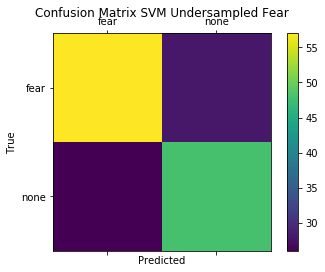

Sensitivity Measure for SVM Fear Classification after undersampling: 0.6486486486486487
Specificity Measure for SVM Fear Classification after undersampling: 0.6705882352941176


In [37]:
X_train_fear, X_test_fear, Y_train_fear, Y_test_fear = train_test_split(normalized_fear_df['description'], 
                                                                            normalized_fear_df['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for anger: {}'.format(normalized_fear_df.shape[0]))
print('Number of rows in the training set for anger: {}'.format(X_train_fear.shape[0]))
print('Number of rows in the test set for anger: {}'.format(X_test_fear.shape[0]))

###################################################################################

# instantiate Countvectorizer method
count_vector_fear = CountVectorizer()

# fit training data and return matrix
training_data_fear = count_vector_fear.fit_transform(X_train_fear)

# transform testing data and return matrix
testing_data_fear = count_vector_fear.transform(X_test_fear)

###################################################################################

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_fear = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_fear.fit(training_data_fear,Y_train_fear)

# predict the labels on validation dataset
predictions_SVM_fear = SVM_fear.predict(testing_data_fear)

###################################################################################

print('Classification report for SVM undersampled fear classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_fear, predictions_SVM_fear, target_names = ['fear', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_fear, Y_test_fear)))
print('Precision score: ', format(precision_score(predictions_SVM_fear, Y_test_fear)))
print('Recall score: ', format(recall_score(predictions_SVM_fear, Y_test_fear)))
print('F1 score: ', format(f1_score(predictions_SVM_fear, Y_test_fear)))
print('---------------------------------------------------------- ')

labels = ['fear', 'none']
cm = confusion_matrix(list(Y_test_fear), predictions_SVM_fear)
print("Confusion matrix SVM undersampled fear: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Undersampled Fear')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_undersampled_fear.png')
plt.show()

TP_fear, FP_fear, TN_fear, FN_fear = perf_measure(list(Y_test_fear), list(predictions_SVM_fear))
sensitivity_fear = TP_fear / (TP_fear+FN_fear)
specificity_fear = TN_fear / (TN_fear + FP_fear)
print("Sensitivity Measure for SVM Fear Classification after undersampling: {sensitivity_fear}".format(sensitivity_fear=str(sensitivity_fear)))
print("Specificity Measure for SVM Fear Classification after undersampling: {specificity_fear}".format(specificity_fear=str(specificity_fear)))

# Create new column for df_anger called clean_text that contains each description cleaned up

In [38]:
df_fear['clean_text'] = [spacy_cleaner(t) for t in df_fear['description']]

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\ï'
  if __name__ == '__main__':
/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\h'
  if __name__ == '__main__':


# Utilize RandomOverSampler in order to oversample the dataset and utilize NB again to compare metrics after oversampling
- RandomOverSampler repeats some entries of the minority class to balance the data

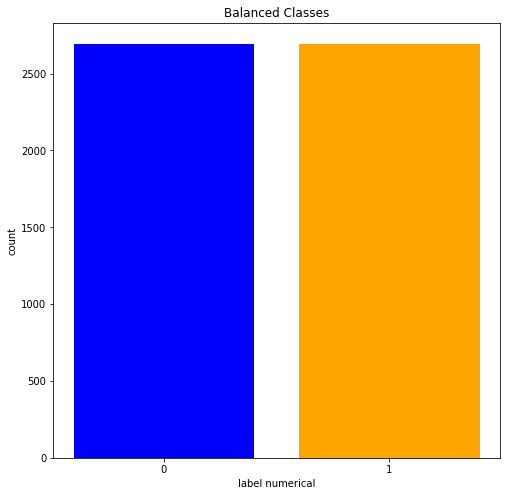

Number of rows in the training set for fear: 4042
Number of rows in the test set for fear: 1348
Classification report for SVM oversampled fear classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        fear       0.95      0.86      0.90       679
        none       0.87      0.95      0.91       669

    accuracy                           0.91      1348
   macro avg       0.91      0.91      0.91      1348
weighted avg       0.91      0.91      0.91      1348

---------------------------------------------------------- 
Accuracy score:  0.9072700296735905
Precision score:  0.9506726457399103
Recall score:  0.8736263736263736
F1 score:  0.9105225483178238
---------------------------------------------------------- 
Confusion matrix SVM oversampled fear: 

[[587  92]
 [ 33 636]]


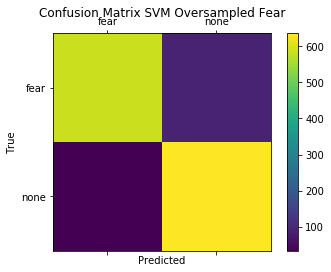

Sensitivity Measure for SVM Fear Classification after oversampling: 0.9506726457399103
Specificity Measure for SVM Fear Classification after oversampling: 0.8645066273932254


In [39]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
# lr = LogisticRegression()

# ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777),lr)
# SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777), lr)

# Fit TfidfVectorizer and use Tfidf representation of texts to oversample
tv = TfidfVectorizer(stop_words=None, max_features=100000)
testing_tfidf = tv.fit_transform(df_fear['clean_text'])
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(testing_tfidf, df_fear['label numerical'])

# df_labelnumerical_temp = df_anger['label numerical']

'''smt = SMOTE(random_state=777)#, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, df_anger['label numerical'])
pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())'''

###################################################################################
'''
loop through all elements of labels and count all positive and negative instances
in order to compare if their counts are balanced
'''
pos_count = 0
neg_count = 0
for y in list(y_ROS):
    if y == 1:
        pos_count += 1
    else:
        neg_count += 1

#plot the dataset after the oversampling
plt.figure(figsize=(8, 8))
y_pos = np.arange(1)
plt.bar(['0', '1'], [neg_count, pos_count], color=('blue', 'orange'))
plt.ylabel('count')
plt.xlabel('label numerical')
plt.title('Balanced Classes')
plt.show()

###################################################################################

X_train_fear, X_test_fear, Y_train_fear, Y_test_fear = train_test_split(X_ROS, 
                                                                        y_ROS, 
                                                                        random_state=1)

#print('Number of rows in the total set for fear: {}'.format(normalized_fear_df.shape[0]))
print('Number of rows in the training set for fear: {}'.format(X_train_fear.shape[0]))
print('Number of rows in the test set for fear: {}'.format(X_test_fear.shape[0]))

###################################################################################

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_fear = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_fear.fit(X_train_fear,Y_train_fear)

# predict the labels on validation dataset
predictions_SVM_fear = SVM_fear.predict(X_test_fear)

###################################################################################

print('Classification report for SVM oversampled fear classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_fear, predictions_SVM_fear, target_names = ['fear', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_fear, Y_test_fear)))
print('Precision score: ', format(precision_score(predictions_SVM_fear, Y_test_fear)))
print('Recall score: ', format(recall_score(predictions_SVM_fear, Y_test_fear)))
print('F1 score: ', format(f1_score(predictions_SVM_fear, Y_test_fear)))
print('---------------------------------------------------------- ')

labels = ['fear', 'none']
cm = confusion_matrix(list(Y_test_fear), predictions_SVM_fear)
print("Confusion matrix SVM oversampled fear: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Oversampled Fear')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_oversampled_fear.png')
plt.show()

TP_fear, FP_fear, TN_fear, FN_fear = perf_measure(list(Y_test_fear), list(predictions_SVM_fear))
sensitivity_fear = TP_fear / (TP_fear+FN_fear)
specificity_fear = TN_fear / (TN_fear + FP_fear)
print("Sensitivity Measure for SVM Fear Classification after oversampling: {sensitivity_fear}".format(sensitivity_fear=str(sensitivity_fear)))
print("Specificity Measure for SVM Fear Classification after oversampling: {specificity_fear}".format(specificity_fear=str(specificity_fear)))

measures_dict_fear = {'accuracy': accuracy_score(predictions_SVM_fear, Y_test_fear),
                'precision': precision_score(predictions_SVM_fear, Y_test_fear),
                'recall': recall_score(predictions_SVM_fear, Y_test_fear),
                'f1': f1_score(predictions_SVM_fear, Y_test_fear),
                'sensitivity': sensitivity_fear,
                'specificity': specificity_fear,
                'name': 'Fear SVM Oversampled'}
fear_oversampled_SVM_measures = Measures('fear_oversampled_SVM_measures', **measures_dict_fear)
fear_oversampled_SVM_measures.write_to_file()
json_output['cases'].append(measures_dict_fear)

# Let's try under-sampling for both classification

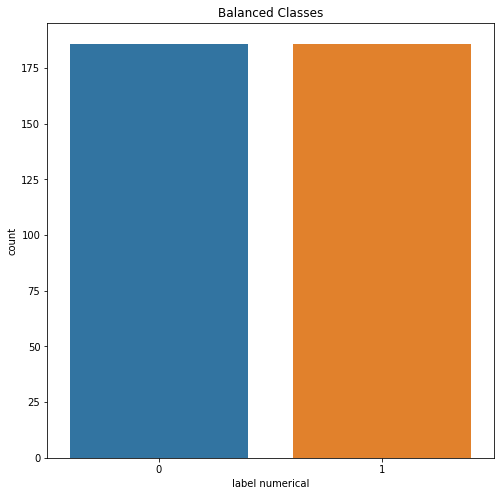

In [40]:
# remove negative samples from overall set for fear 
# this will ensure that the number of positive and negative samples are equal
pos_both_df = df_both.loc[df_both['label numerical'] == 1]

neg_both_df = df_both.loc[df_both['label numerical'] == 0].sample(n=186, random_state=42)

normalized_both_df = pd.concat([pos_both_df, neg_both_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('label numerical', data=normalized_both_df)
plt.title('Balanced Classes')
plt.show()

# Repeat steps from above for both classification again after undersamplilng

Number of rows in the total set for both: 372
Number of rows in the training set for both: 279
Number of rows in the test set for both: 93
Classification report for SVM undersampled both classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        both       0.67      0.76      0.71        49
        none       0.68      0.59      0.63        44

    accuracy                           0.68        93
   macro avg       0.68      0.67      0.67        93
weighted avg       0.68      0.68      0.67        93

---------------------------------------------------------- 
Accuracy score:  0.6774193548387096
Precision score:  0.5909090909090909
Recall score:  0.6842105263157895
F1 score:  0.6341463414634148
---------------------------------------------------------- 
Confusion matrix SVM undersampled both: 

[[37 12]
 [18 26]]


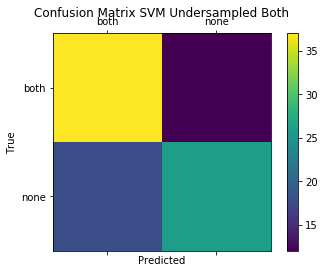

Sensitivity Measure for SVM Both Classification after undersampling: 0.5909090909090909
Specificity Measure for SVM Both Classification after undersampling: 0.7551020408163265


In [41]:
X_train_both, X_test_both, Y_train_both, Y_test_both = train_test_split(normalized_both_df['description'], 
                                                                            normalized_both_df['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for both: {}'.format(normalized_both_df.shape[0]))
print('Number of rows in the training set for both: {}'.format(X_train_both.shape[0]))
print('Number of rows in the test set for both: {}'.format(X_test_both.shape[0]))

###################################################################################

# instantiate Countvectorizer method
count_vector_both = CountVectorizer()

# fit training data and return matrix
training_data_both = count_vector_both.fit_transform(X_train_both)

# transform testing data and return matrix
testing_data_both = count_vector_both.transform(X_test_both)

###################################################################################

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_both = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_both.fit(training_data_both,Y_train_both)

# predict the labels on validation dataset
predictions_SVM_both = SVM_both.predict(testing_data_both)

###################################################################################

print('Classification report for SVM undersampled both classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_both, predictions_SVM_both, target_names = ['both', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_both, Y_test_both)))
print('Precision score: ', format(precision_score(predictions_SVM_both, Y_test_both)))
print('Recall score: ', format(recall_score(predictions_SVM_both, Y_test_both)))
print('F1 score: ', format(f1_score(predictions_SVM_both, Y_test_both)))
print('---------------------------------------------------------- ')

labels = ['both', 'none']
cm = confusion_matrix(list(Y_test_both), predictions_SVM_both)
print("Confusion matrix SVM undersampled both: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Undersampled Both')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_undersampled_both.png')
plt.show()

TP_both, FP_both, TN_both, FN_both = perf_measure(list(Y_test_both), list(predictions_SVM_both))
sensitivity_both = TP_both / (TP_both+FN_both)
specificity_both = TN_both / (TN_both + FP_both)
print("Sensitivity Measure for SVM Both Classification after undersampling: {sensitivity_both}".format(sensitivity_both=str(sensitivity_both)))
print("Specificity Measure for SVM Both Classification after undersampling: {specificity_both}".format(specificity_both=str(specificity_both)))

# Create new column for df_anger called clean_text that contains each description cleaned up

In [42]:
df_both['clean_text'] = [spacy_cleaner(t) for t in df_both['description']]

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\ï'
  if __name__ == '__main__':
/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\h'
  if __name__ == '__main__':


# Utilize RandomOverSampler in order to oversample the dataset and utilize NB again to compare metrics after oversampling
- RandomOverSampler repeats some entries of the minority class to balance the data

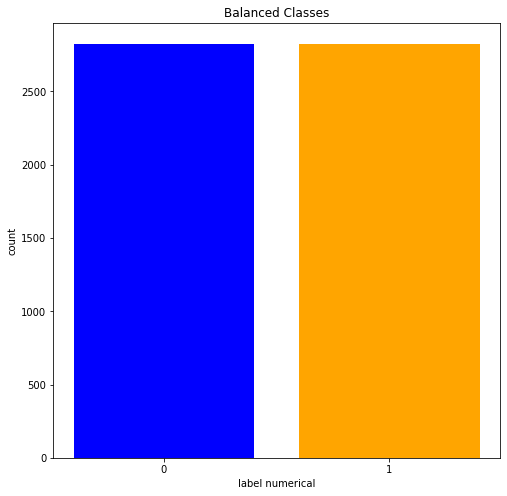

Number of rows in the training set for both: 4239
Number of rows in the test set for both: 1413
Classification report for SVM oversampled both classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        both       0.99      0.89      0.94       714
        none       0.90      0.99      0.94       699

    accuracy                           0.94      1413
   macro avg       0.94      0.94      0.94      1413
weighted avg       0.94      0.94      0.94      1413

---------------------------------------------------------- 
Accuracy score:  0.9391365888181175
Precision score:  0.9914163090128756
Recall score:  0.8965071151358344
F1 score:  0.9415760869565217
---------------------------------------------------------- 
Confusion matrix SVM oversampled both: 

[[634  80]
 [  6 693]]


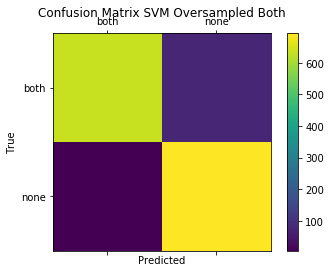

Sensitivity Measure for SVM Both Classification after oversampling: 0.9914163090128756
Specificity Measure for SVM Both Classification after oversampling: 0.8879551820728291


In [43]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
# lr = LogisticRegression()

# ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777),lr)
# SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777), lr)

# Fit TfidfVectorizer and use Tfidf representation of texts to oversample
tv = TfidfVectorizer(stop_words=None, max_features=100000)
testing_tfidf = tv.fit_transform(df_both['clean_text'])
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(testing_tfidf, df_both['label numerical'])

# df_labelnumerical_temp = df_anger['label numerical']

'''smt = SMOTE(random_state=777)#, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, df_anger['label numerical'])
pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())'''

###################################################################################
'''
loop through all elements of labels and count all positive and negative instances
in order to compare if their counts are balanced
'''
pos_count = 0
neg_count = 0
for y in list(y_ROS):
    if y == 1:
        pos_count += 1
    else:
        neg_count += 1

#plot the dataset after the oversampling
plt.figure(figsize=(8, 8))
y_pos = np.arange(1)
plt.bar(['0', '1'], [neg_count, pos_count], color=('blue', 'orange'))
plt.ylabel('count')
plt.xlabel('label numerical')
plt.title('Balanced Classes')
plt.show()

###################################################################################

X_train_both, X_test_both, Y_train_both, Y_test_both = train_test_split(X_ROS, 
                                                                        y_ROS, 
                                                                        random_state=1)

#print('Number of rows in the total set for fear: {}'.format(normalized_fear_df.shape[0]))
print('Number of rows in the training set for both: {}'.format(X_train_both.shape[0]))
print('Number of rows in the test set for both: {}'.format(X_test_both.shape[0]))

###################################################################################

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_both = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_both.fit(X_train_both,Y_train_both)

# predict the labels on validation dataset
predictions_SVM_both = SVM_both.predict(X_test_both)

###################################################################################

print('Classification report for SVM oversampled both classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_both, predictions_SVM_both, target_names = ['both', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_both, Y_test_both)))
print('Precision score: ', format(precision_score(predictions_SVM_both, Y_test_both)))
print('Recall score: ', format(recall_score(predictions_SVM_both, Y_test_both)))
print('F1 score: ', format(f1_score(predictions_SVM_both, Y_test_both)))
print('---------------------------------------------------------- ')

labels = ['both', 'none']
cm = confusion_matrix(list(Y_test_both), predictions_SVM_both)
print("Confusion matrix SVM oversampled both: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix SVM Oversampled Both')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_oversampled_both.png')
plt.show()

TP_both, FP_both, TN_both, FN_both = perf_measure(list(Y_test_both), list(predictions_SVM_both))
sensitivity_both = TP_both / (TP_both+FN_both)
specificity_both = TN_both / (TN_both + FP_both)
print("Sensitivity Measure for SVM Both Classification after oversampling: {sensitivity_both}".format(sensitivity_both=str(sensitivity_both)))
print("Specificity Measure for SVM Both Classification after oversampling: {specificity_both}".format(specificity_both=str(specificity_both)))

measures_dict_both = {'accuracy': accuracy_score(predictions_SVM_both, Y_test_both),
                'precision': precision_score(predictions_SVM_both, Y_test_both),
                'recall': recall_score(predictions_SVM_both, Y_test_both),
                'f1': f1_score(predictions_SVM_both, Y_test_both),
                'sensitivity': sensitivity_both,
                'specificity': specificity_both,
                'name': 'Both SVM Oversampled'}
both_oversampled_SVM_measures = Measures('both_oversampled_SVM_measures', **measures_dict_both)
both_oversampled_SVM_measures.write_to_file()
json_output['cases'].append(measures_dict_both)

# Create list of TP, FP, FN, TN based on predictions made on oversampled both classification

In [82]:
Y_test_both_list = np.array(Y_test_both) # convert into array for indexing

# form list of TP, FP, FN, TN based on each prediction compared against ground truth
prediction_outcome_list_both = []
for x in range(len(predictions_SVM_both)):
    if predictions_SVM_both[x] == 1 and Y_test_both_list[x] == 1:
        prediction_outcome_list_both.append('TP')
    elif predictions_SVM_both[x] == 1 and Y_test_both_list[x] == 0:
        prediction_outcome_list_both.append('FP')
    elif predictions_SVM_both[x] == 0 and Y_test_both_list[x] == 1:
        prediction_outcome_list_both.append('FN')
    elif predictions_SVM_both[x] == 0 and Y_test_both_list[x] == 0:
        prediction_outcome_list_both.append('TN')
    
    
prediction_outcome_list_both

['TN',
 'TN',
 'FP',
 'TN',
 'TP',
 'TP',
 'TP',
 'FP',
 'TP',
 'TN',
 'FN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'FP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'FP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'FP',
 'TN',
 'FP',
 'TP',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'FP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'FP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'FP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TP',
 'TN',
 'TP',
 'TP',

# Create list of TP, FP, FN, TN based on predictions made on oversampled anger classification

In [84]:
Y_test_anger_list = np.array(Y_test_anger) # convert into array for indexing

# form list of TP, FP, FN, TN based on each prediction compared against ground truth
prediction_outcome_list_anger = []
for x in range(len(predictions_SVM_anger)):
    if predictions_SVM_anger[x] == 1 and Y_test_anger_list[x] == 1:
        prediction_outcome_list_anger.append('TP')
    elif predictions_SVM_anger[x] == 1 and Y_test_anger_list[x] == 0:
        prediction_outcome_list_anger.append('FP')
    elif predictions_SVM_anger[x] == 0 and Y_test_anger_list[x] == 1:
        prediction_outcome_list_anger.append('FN')
    elif predictions_SVM_anger[x] == 0 and Y_test_anger_list[x] == 0:
        prediction_outcome_list_anger.append('TN')
    
    
prediction_outcome_list_anger

['TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'FN',
 'TP',
 'TP',
 'FN',
 'TN',
 'FP',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'FP',
 'FP',
 'TP',
 'FN',
 'TP',
 'TP',
 'FP',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'FP',
 'FP',
 'TP',
 'FP',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'FP',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TP',
 'TN',
 'FP',
 'TN',
 'FP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TP',
 'TN',
 'FN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'FP',
 'FP',
 'TN',
 'TP',
 'FP',
 'TN',
 'TP',
 'TP',
 'FP',
 'TN',
 'TP',
 'TN',
 'FN',
 'TP',
 'TP',
 'TN',
 'TN',
 'FN',
 'TP',
 'TP',
 'TN',
 'FP',
 'TN',
 'TP',
 'FP',
 'TN',
 'FP',
 'TP',
 'FP',
 'TP',
 'FP',
 'TP',
 'TP',
 'TN',
 'TN',
 'FP',
 'TP',
 'TP',
 'TN',
 'FP',
 'TP',
 'FP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'FP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'FP',
 'TP',
 'TP',
 'FP',
 'FN',
 'TN',

# Create list of TP, FP, FN, TN based on predictions made on oversampled fear classification

In [87]:
Y_test_fear_list = np.array(Y_test_fear) # convert into array for indexing

# form list of TP, FP, FN, TN based on each prediction compared against ground truth
prediction_outcome_list_fear = []
for x in range(len(predictions_SVM_fear)):
    if predictions_SVM_fear[x] == 1 and Y_test_fear_list[x] == 1:
        prediction_outcome_list_fear.append('TP')
    elif predictions_SVM_fear[x] == 1 and Y_test_fear_list[x] == 0:
        prediction_outcome_list_fear.append('FP')
    elif predictions_SVM_fear[x] == 0 and Y_test_fear_list[x] == 1:
        prediction_outcome_list_fear.append('FN')
    elif predictions_SVM_fear[x] == 0 and Y_test_fear_list[x] == 0:
        prediction_outcome_list_fear.append('TN')
    
    
prediction_outcome_list_fear

['TN',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'FP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'FN',
 'TP',
 'TN',
 'TN',
 'FP',
 'TP',
 'FP',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'FN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'FP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'FP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'FP',
 'TP',
 'TN',
 'TP',
 'TN',
 'TP',
 'FP',
 'TP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'FP',
 'FP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'FP',
 'TP',
 'TN',
 'TN',
 'FN',
 'TN',
 'TN',
 'TP',
 'TP',
 'FP',
 'FP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TP',
 'TP',

In [93]:
url_list = []

for i, row in df_items.iterrows():
    url_list.append(row['url']) # add description
        

df = pd.DataFrame(list(zip(descriptions_list, url_list, prediction_outcome_list_both, prediction_outcome_list_anger, prediction_outcome_list_fear)), columns=['Description', 'URL', 'Prediction Comparison -- Both', 'Prediction Comparison -- Anger', 'Prediction Comparison -- Fear'])
df.to_csv('prediction_comparison.csv', index=False)
df

,Description,URL,Prediction Comparison -- Both,Prediction Comparison -- Anger,Prediction Comparison -- Fear
0,Black American racial experience is real. We s...,https://mith.umd.edu/irads/api/items/6456,TN,TN,TN
1,The best costume for Halloween worth posting. ...,https://mith.umd.edu/irads/api/items/6457,TN,TP,TN
2,"Keep on whining and crying for your president,...",https://mith.umd.edu/irads/api/items/6458,FP,TN,TP
3,"End the whining and crying, end the riots with...",https://mith.umd.edu/irads/api/items/6459,TN,TP,TP
4,Black girls are the definition of national gre...,https://mith.umd.edu/irads/api/items/6460,TP,TP,TN
...,...,...,...,...,...
1111,Free online player! Just add in ur browser and...,https://mith.umd.edu/irads/api/items/7567,TP,TP,FP
1112,First online player for ur browser! Listen eve...,https://mith.umd.edu/irads/api/items/7568,TN,TP,TP
1113,Close the borders until it's too late.\nLike t...,https://mith.umd.edu/irads/api/items/7569,TP,TP,TN
1114,Looks like an Apple mouse,https://mith.umd.edu/irads/api/items/7570,TP,TN,TP


In [44]:
import json
with open('SVM_measures.json', 'w') as outfile:
    json.dump(json_output, outfile)

In [45]:
with open('SVM_measures.json') as json_file:
    data = json.load(json_file)

print(data['cases'][0])

{'accuracy': 0.8046594982078853, 'precision': 0.8501742160278746, 'recall': 0.7870967741935484, 'f1': 0.8174204355108877, 'sensitivity': 0.8501742160278746, 'specificity': 0.7564575645756457, 'name': 'Anger SVM Oversampled'}
